In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os


#### Packages for Modeling ####
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
dataset = "data/109cleaned.csv"#be aware to locate the file

df = pd.read_csv(dataset)
dfo = pd.read_csv(dataset)

In [3]:
df.head()

,Severity,Weekday,Duration(min),Duration(day),Start_Time,End_Time,Distance(mi),Description,Street,City,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
0,3,Tuesday,30.0,0,2016-06-21 10:57:39,2016-06-21 11:27:39,0.0,Accident on I-805 Northbound at Exit 17A 32nd St.,I-805 N,San Diego,...,0,0,0,0,0,0,0,0,0,1
1,3,Tuesday,30.0,0,2016-06-21 10:50:48,2016-06-21 11:20:48,0.0,HOV lane blocked due to accident on I-15 North...,Escondido Fwy S,San Diego,...,0,0,0,0,0,0,0,0,0,1
2,2,Tuesday,45.0,0,2016-06-21 11:12:25,2016-06-21 11:57:25,0.0,Accident on Elkelton Blvd at Paradise Valley Rd.,Elkelton Blvd,Spring Valley,...,0,0,0,0,0,0,0,0,0,1
3,2,Tuesday,30.0,0,2016-06-21 11:49:42,2016-06-21 12:19:42,0.0,Accident on Calle Fortunada at Ruffin Rd.,Calle Fortunada,San Diego,...,0,0,0,0,0,0,0,0,0,1
4,2,Tuesday,45.0,0,2016-06-21 11:49:18,2016-06-21 12:34:18,0.0,Accident on CA-52 Westbound at Exit 15B Fanita...,CA-52 E,Santee,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84718 entries, 0 to 84717
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           84718 non-null  int64  
 1   Weekday            84718 non-null  object 
 2   Duration(min)      84718 non-null  float64
 3   Duration(day)      84718 non-null  int64  
 4   Start_Time         84718 non-null  object 
 5   End_Time           84718 non-null  object 
 6   Distance(mi)       84718 non-null  float64
 7   Description        84718 non-null  object 
 8   Street             84718 non-null  object 
 9   City               84718 non-null  object 
 10  Temperature(F)     84718 non-null  float64
 11  Humidity(%)        84718 non-null  float64
 12  Pressure(in)       84718 non-null  float64
 13  Visibility(mi)     84718 non-null  float64
 14  Wind_Direction     84718 non-null  object 
 15  Wind_Speed(mph)    84718 non-null  float64
 16  Weather_Condition  847

In [5]:
# Check number of missing values in dataset
df.isnull().sum()

Severity             0
Weekday              0
Duration(min)        0
Duration(day)        0
Start_Time           0
End_Time             0
Distance(mi)         0
Description          0
Street               0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
dtype: int64

In [6]:
print(df.apply(lambda col: col.unique()))

Severity                                                  [3, 2, 1, 4]
Weekday              [Tuesday, Wednesday, Thursday, Friday, Saturda...
Duration(min)        [30.0, 45.0, 60.0, 40.43, 42.63, 43.23, 41.03,...
Duration(day)                                                   [0, 1]
Start_Time           [2016-06-21 10:57:39, 2016-06-21 10:50:48, 201...
End_Time             [2016-06-21 11:27:39, 2016-06-21 11:20:48, 201...
Distance(mi)         [0.0, 0.01, 1.87, 0.77, 0.47, 9.27, 0.34, 2.18...
Description          [Accident on I-805 Northbound at Exit 17A 32nd...
Street               [I-805 N, Escondido Fwy S, Elkelton Blvd, Call...
City                 [San Diego, Spring Valley, Santee, La Jolla, E...
Temperature(F)       [69.1, 73.0, 75.2, 71.1, 70.0, 72.0, 69.8, 84....
Humidity(%)          [75.0, 66.0, 61.0, 73.0, 76.0, 71.0, 78.0, 35....
Pressure(in)         [29.98, 29.97, 30.01, 30.0, 29.99, 29.95, 29.9...
Visibility(mi)       [9.0, 10.0, 7.0, 8.0, 6.0, 5.0, 4.0, 0.5, 3.0,...
Wind_D

Let's take a look at our data and see if there are any imbalances

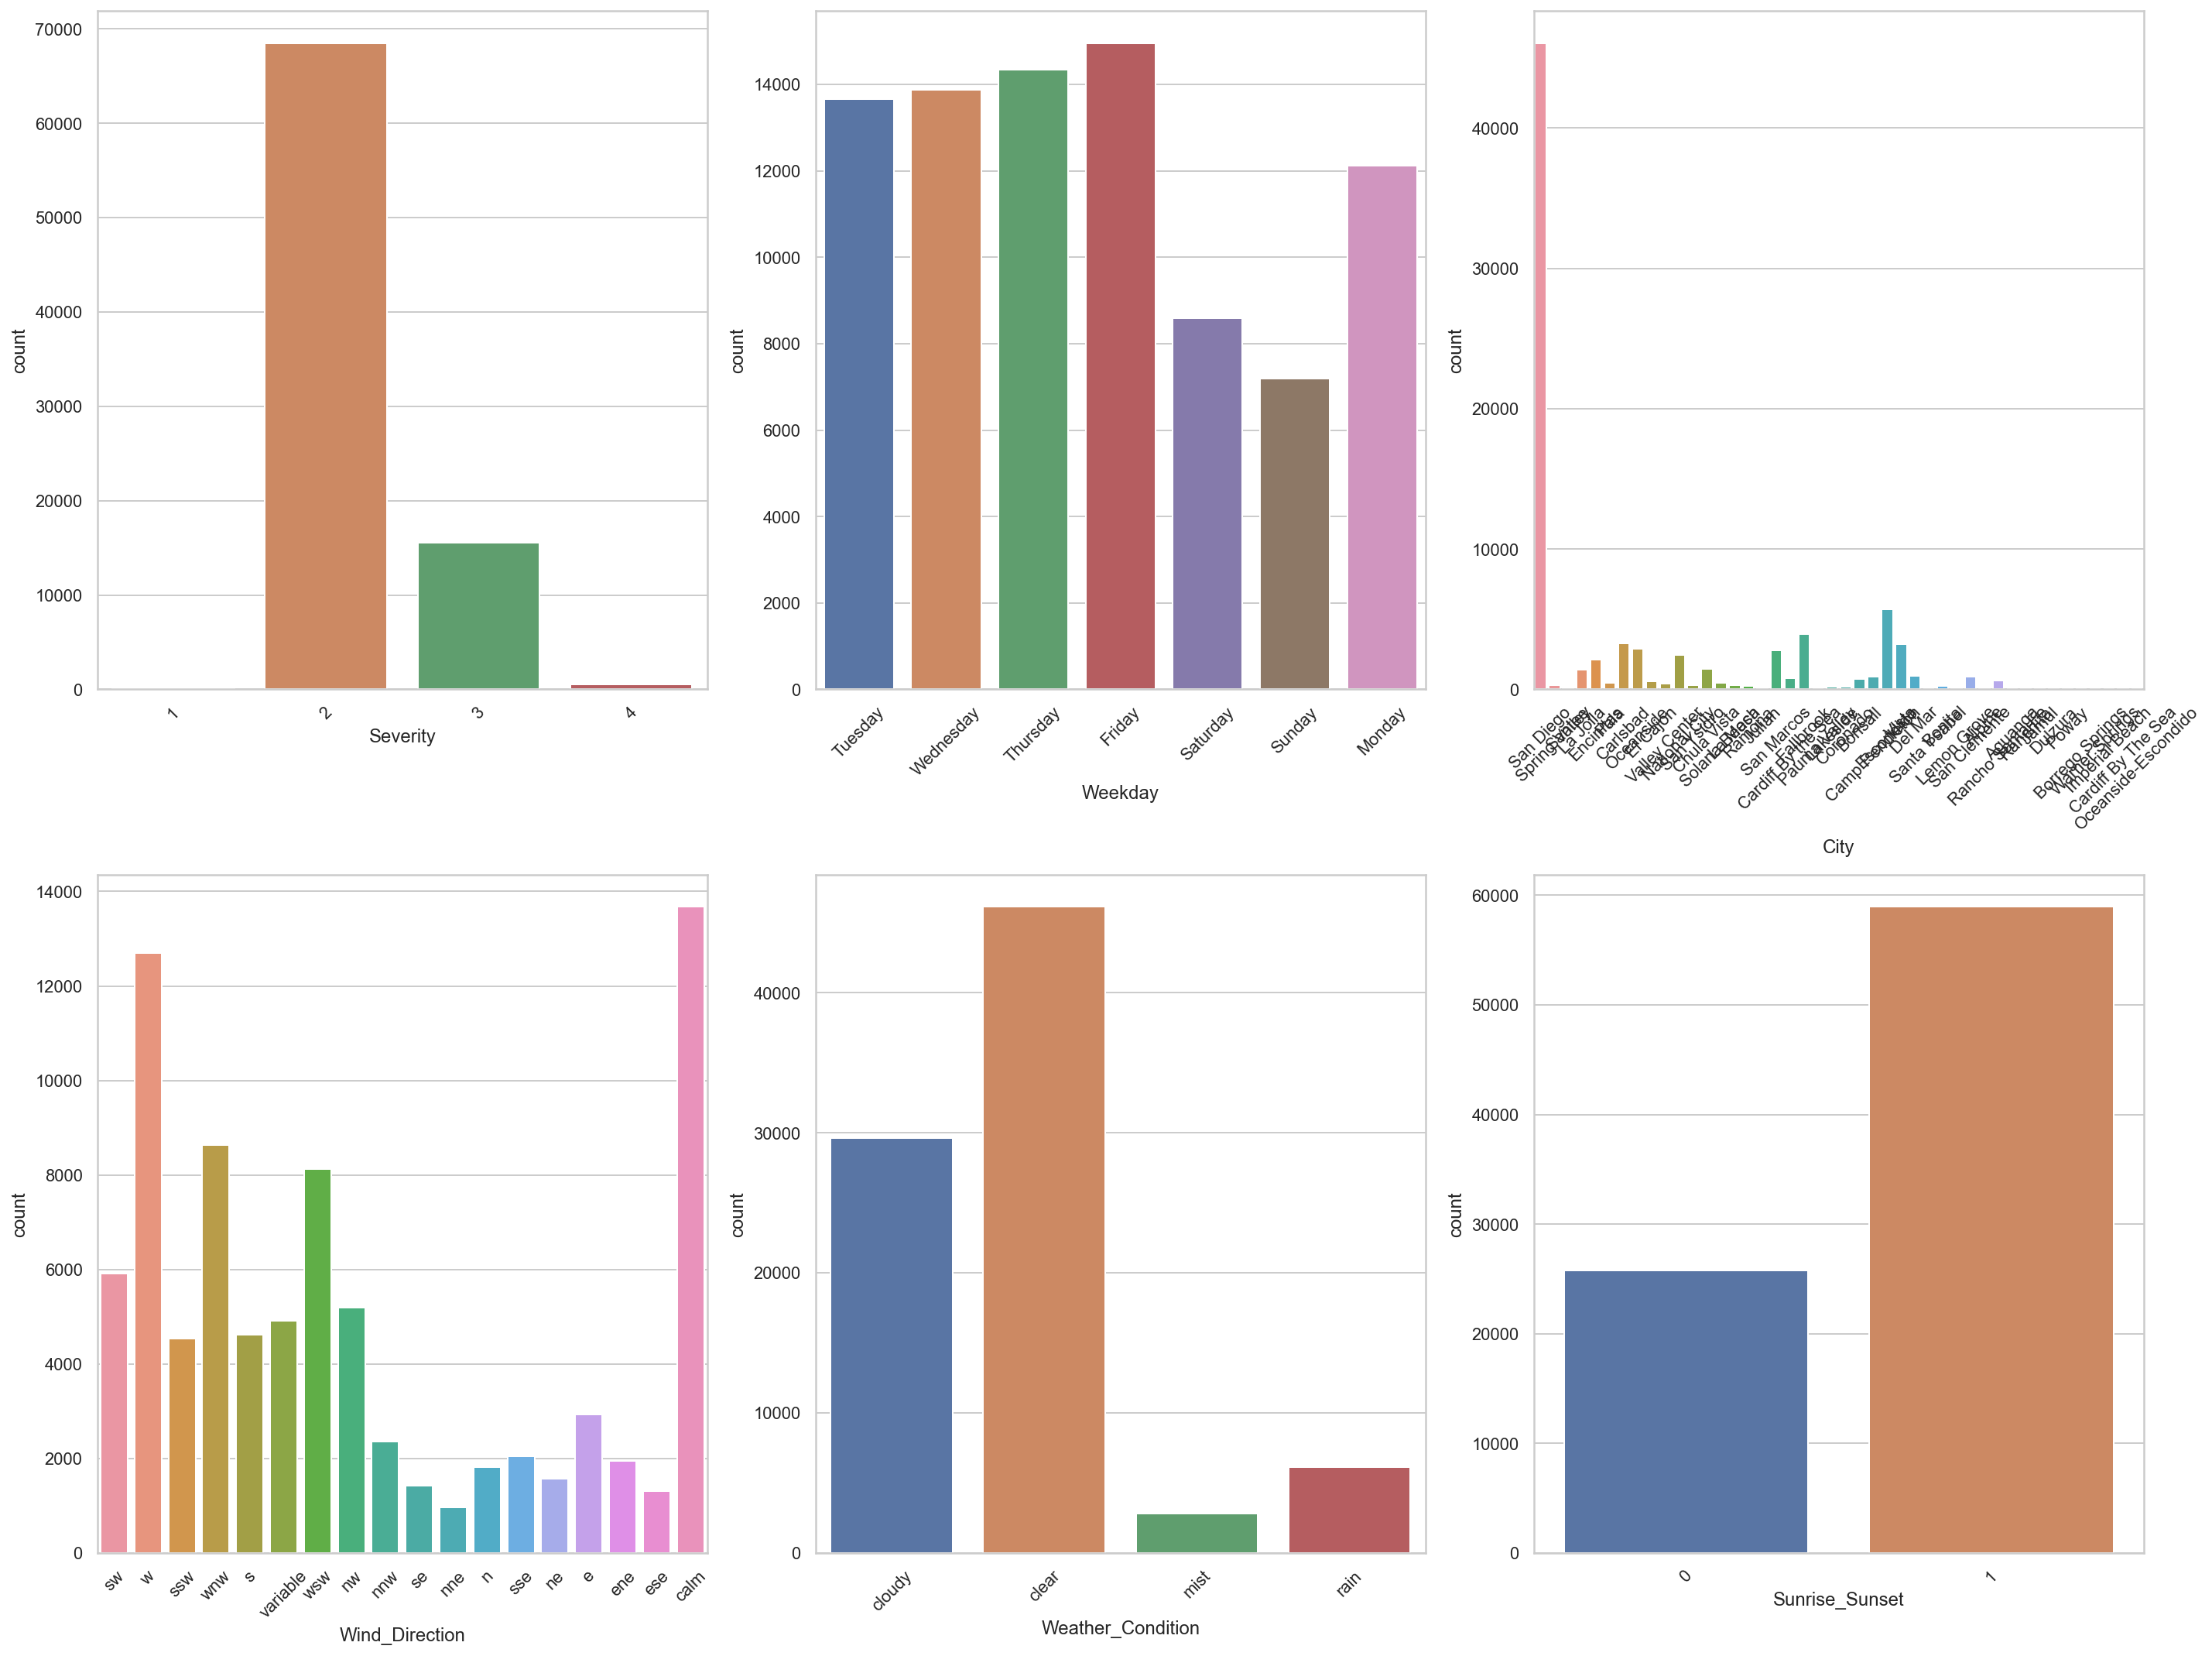

In [7]:
categorical_features = ['Severity','Weekday','City', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']

fig, axs = plt.subplots(2, 3, figsize=(20, 15))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.countplot(x=feature, data=df, ax=axs[row, col])
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

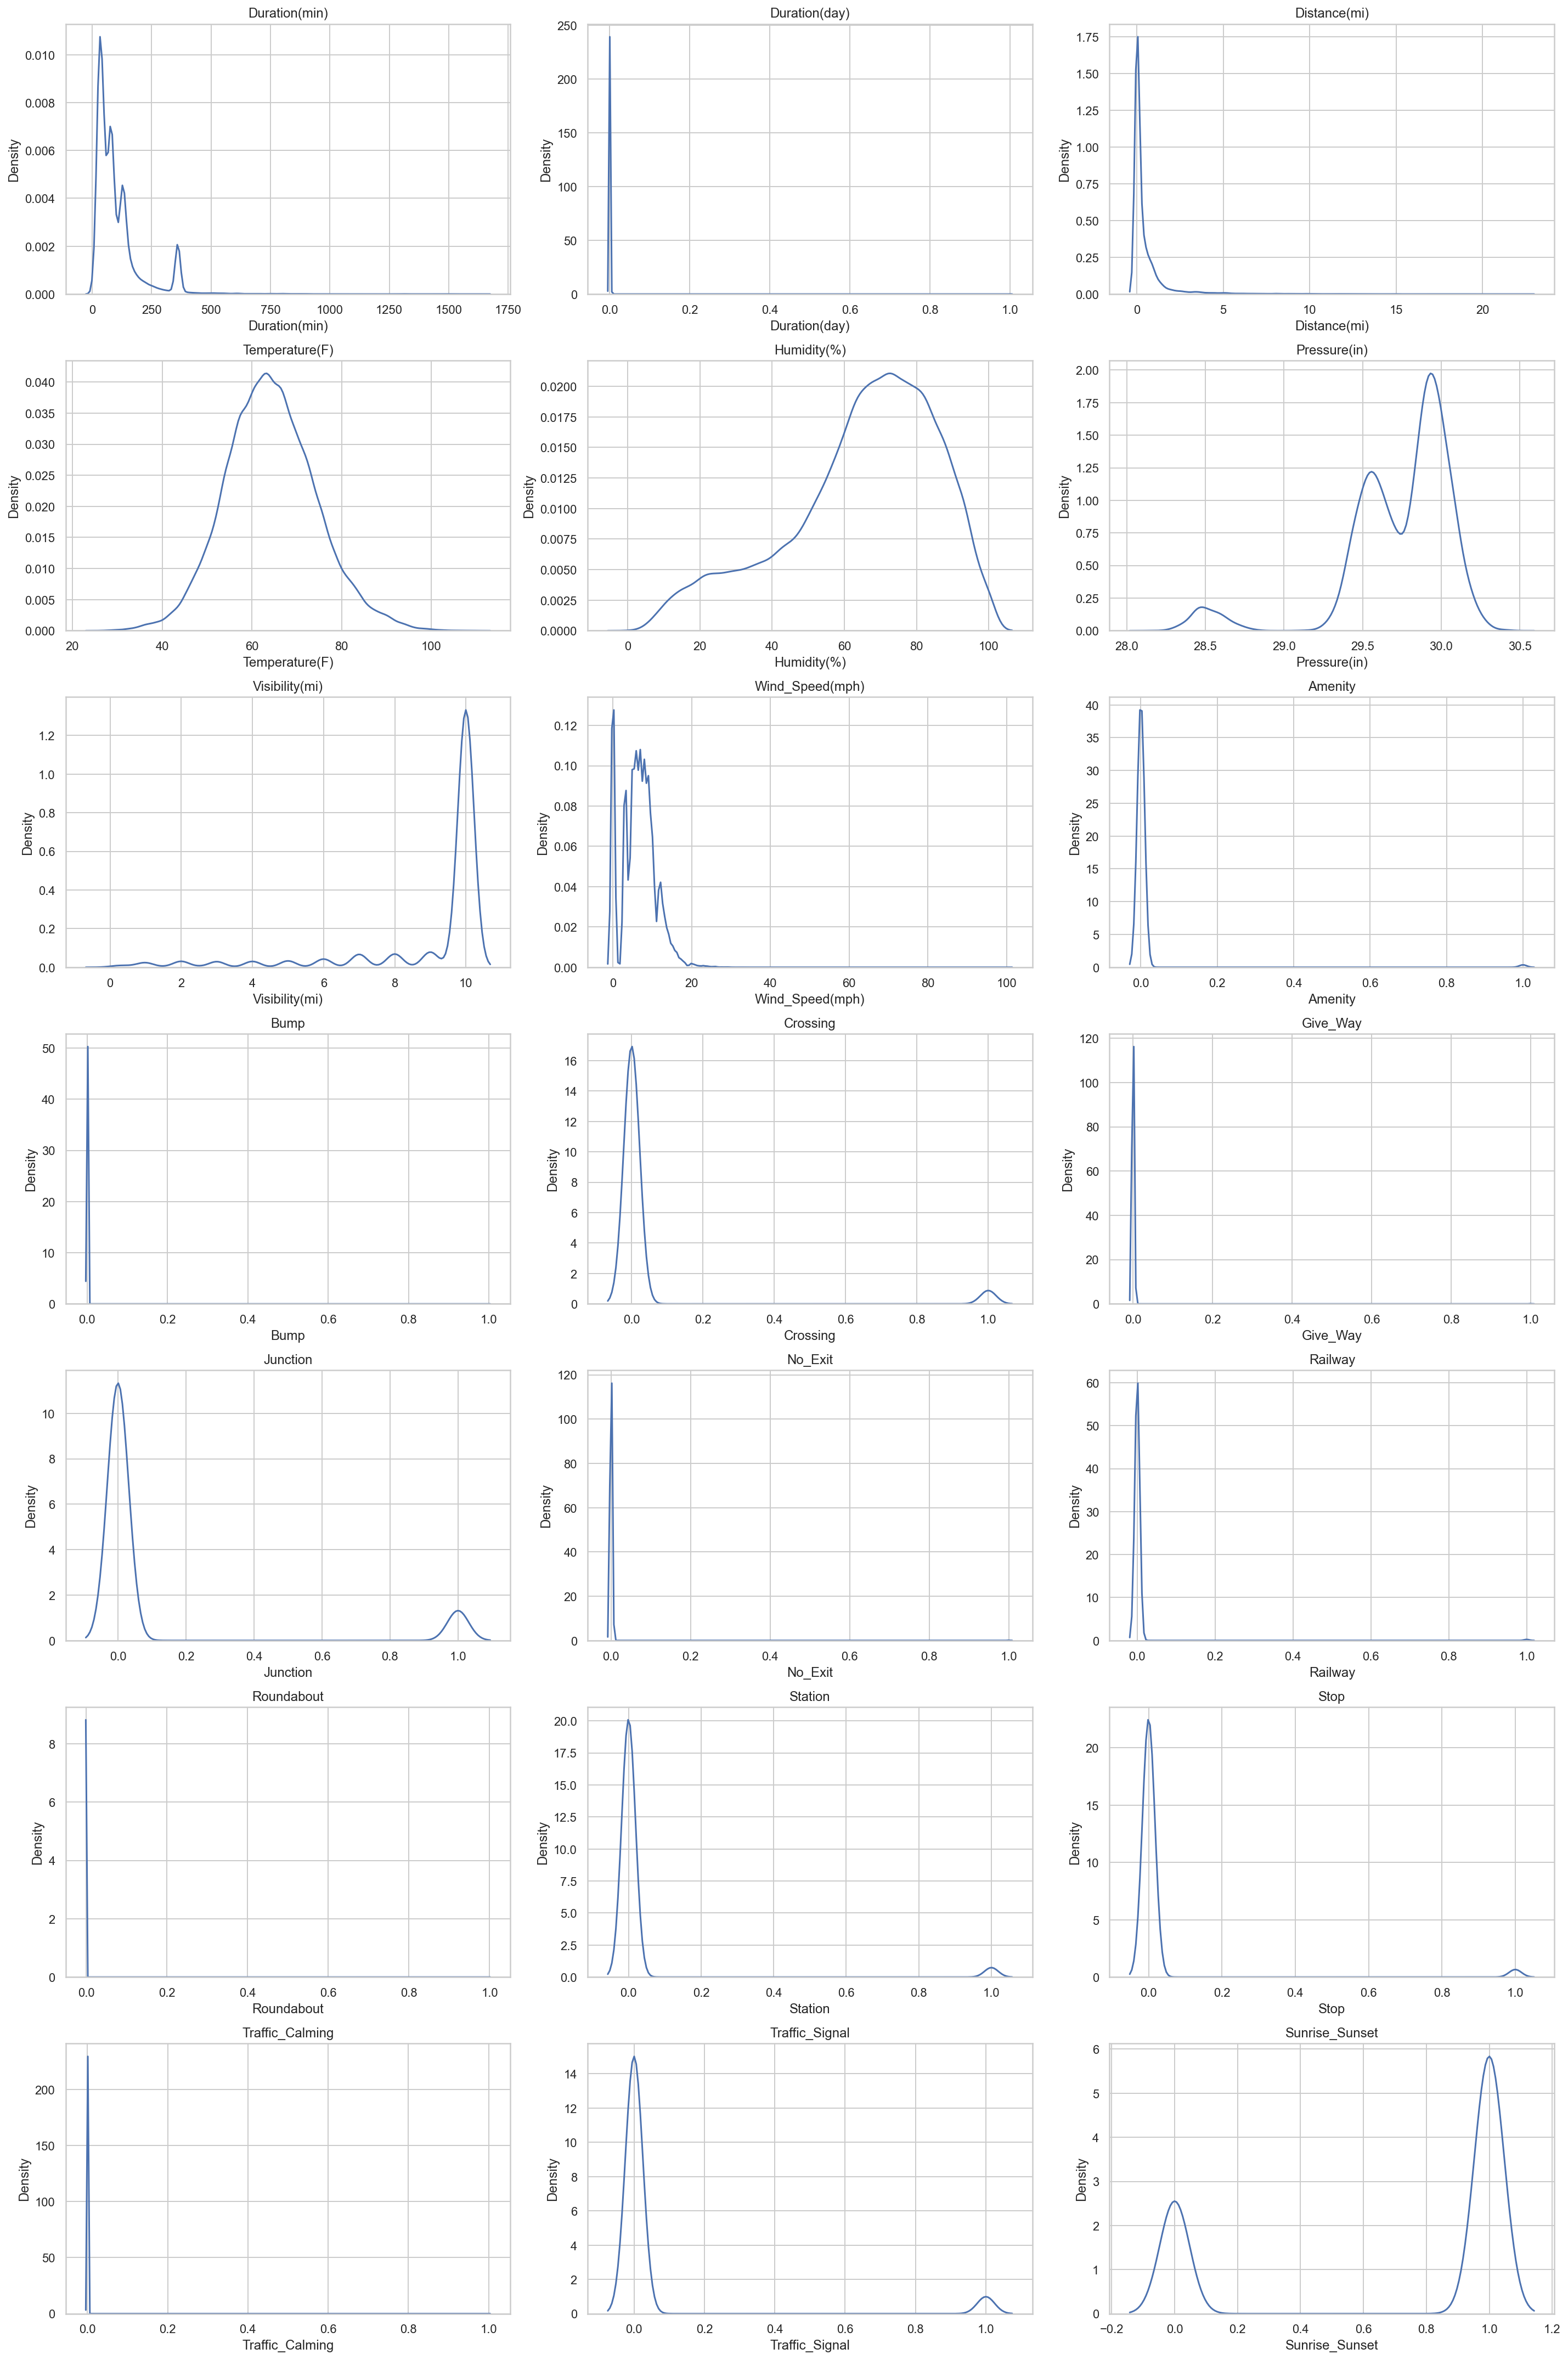

In [ ]:
numerical_features = ['Duration(min)', 'Duration(day)', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                      'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']

fig, axs = plt.subplots(7, 3, figsize=(20, 30))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3

    sns.kdeplot(x=feature, data=df, ax=axs[row, col])
    axs[row, col].set_title(feature)


plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(['Description','Distance(mi)', 'End_Time'], axis=1)

In [10]:
# Convert "Start_Time" columns to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Separate Start time into separate columns
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Minute'] = df['Start_Time'].dt.hour


df.head()


,Severity,Weekday,Duration(min),Duration(day),Start_Time,Street,City,Temperature(F),Humidity(%),Pressure(in),...,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Minute
0,3,Tuesday,30.0,0,2016-06-21 10:57:39,I-805 N,San Diego,69.1,75.0,29.98,...,0,0,0,0,1,2016,6,21,10,10
1,3,Tuesday,30.0,0,2016-06-21 10:50:48,Escondido Fwy S,San Diego,73.0,66.0,29.97,...,0,0,0,0,1,2016,6,21,10,10
2,2,Tuesday,45.0,0,2016-06-21 11:12:25,Elkelton Blvd,Spring Valley,75.2,61.0,29.97,...,0,0,0,0,1,2016,6,21,11,11
3,2,Tuesday,30.0,0,2016-06-21 11:49:42,Calle Fortunada,San Diego,71.1,73.0,30.01,...,0,0,0,0,1,2016,6,21,11,11
4,2,Tuesday,45.0,0,2016-06-21 11:49:18,CA-52 E,Santee,75.2,61.0,30.00,...,0,0,0,0,1,2016,6,21,11,11


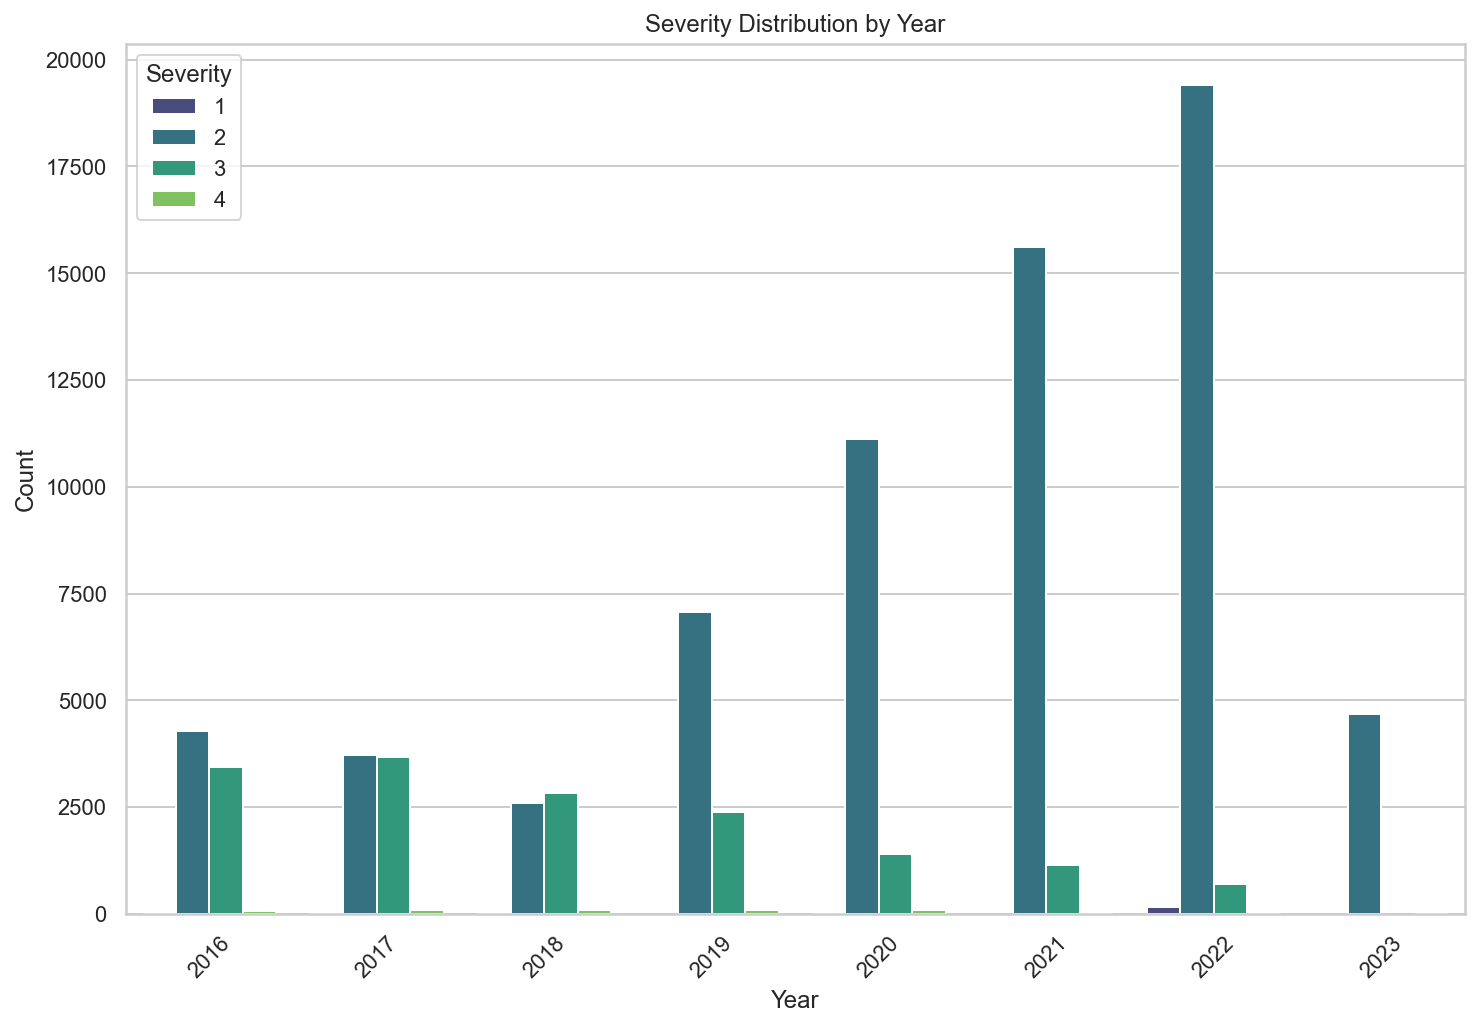

In [11]:
severity_by_year = df.groupby(['Year', 'Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Year', hue='Severity', palette='viridis')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Severity Distribution by Year')

plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.show()


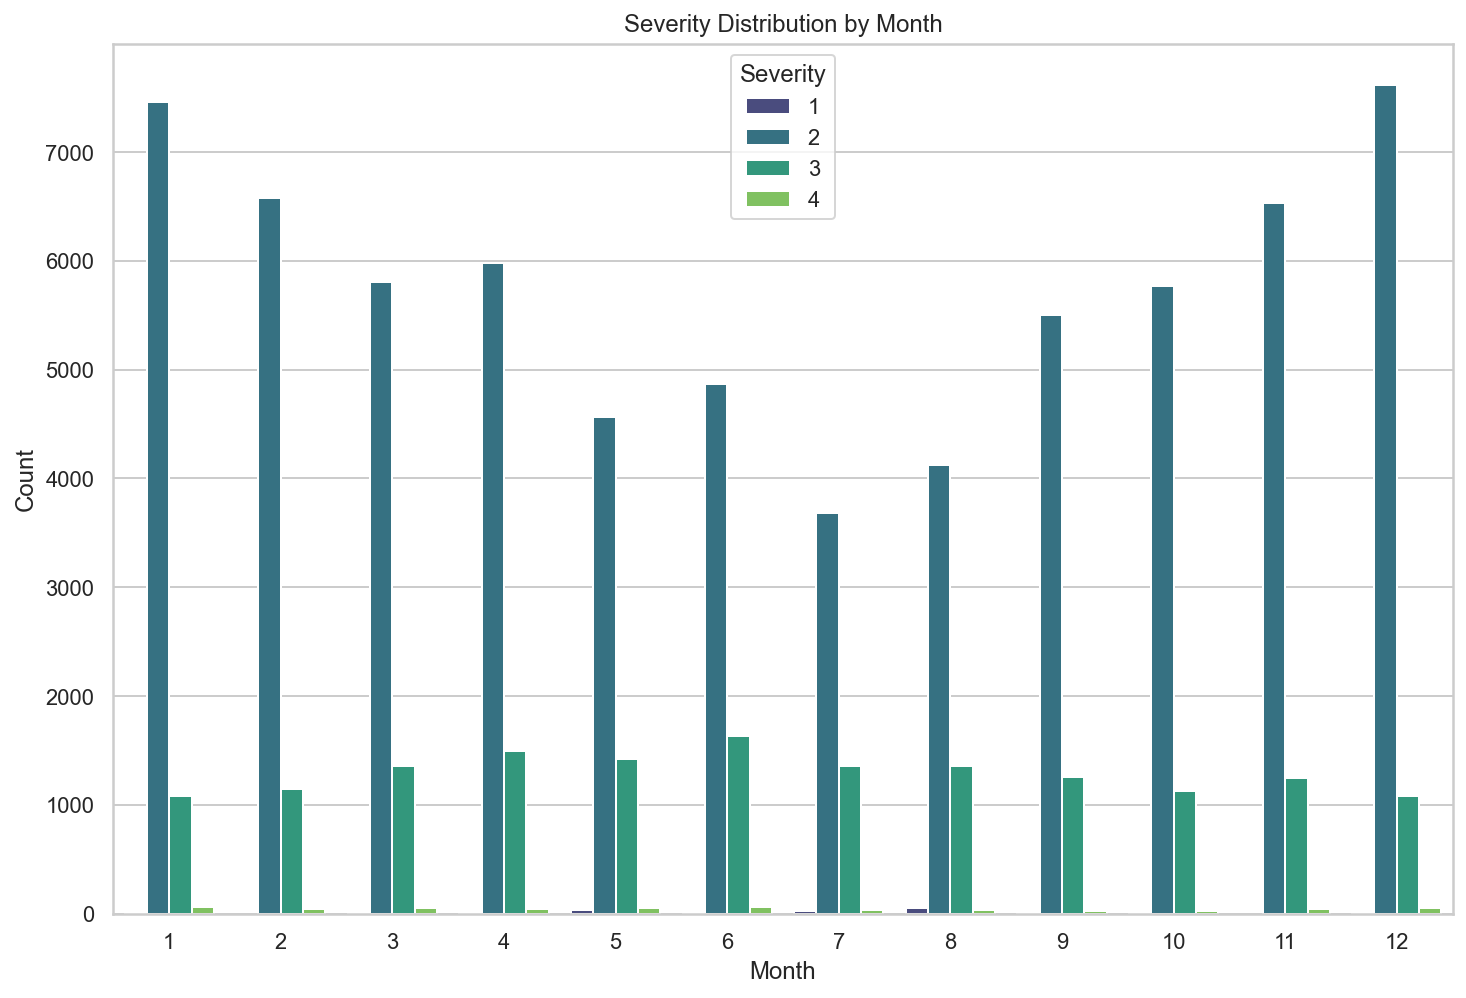

In [12]:
severity_by_month = df.groupby(['Month', 'Severity']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Severity', palette='viridis')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Severity Distribution by Month')
plt.legend(title='Severity')


plt.show()


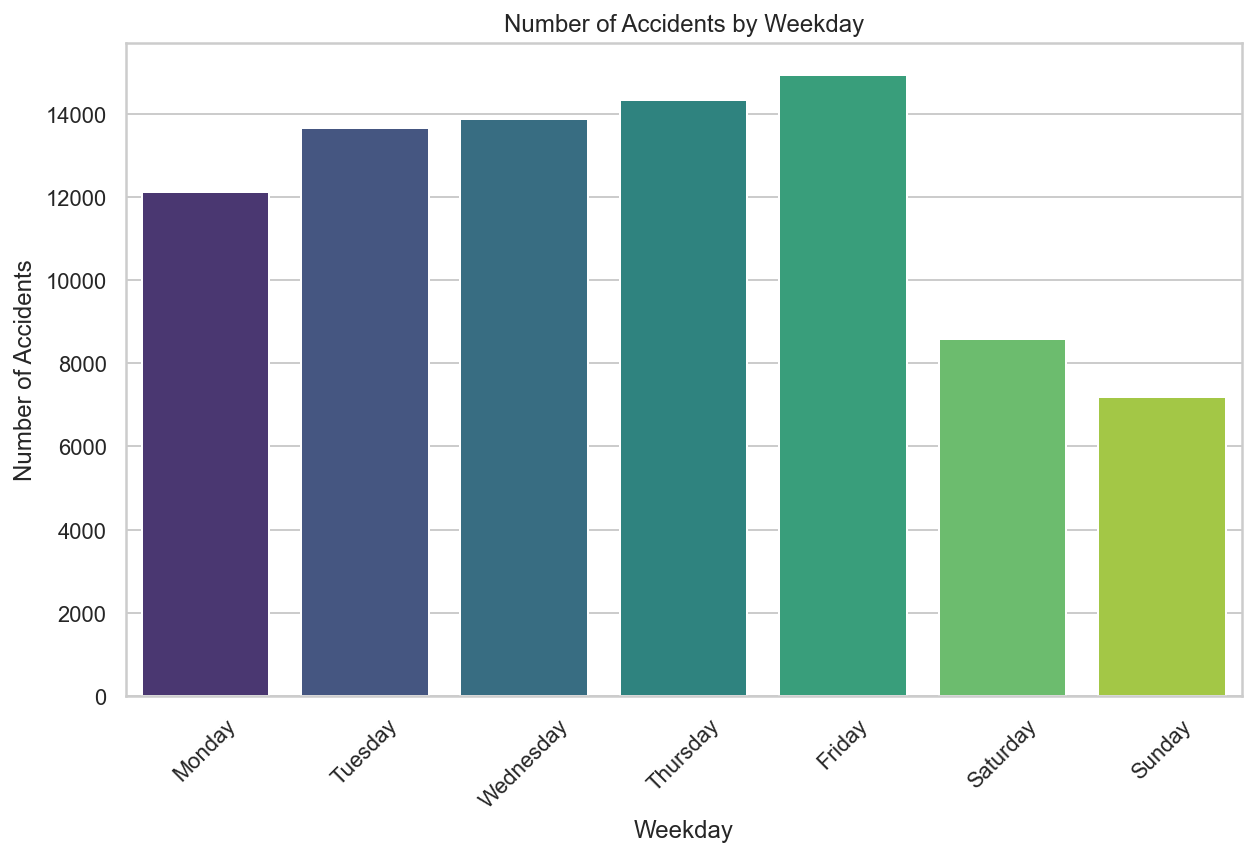

In [13]:
accidents_per_weekday = df.groupby('Weekday').size().reset_index(name='Count')
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Count', data=accidents_per_weekday, order=weekdays, palette='viridis')

plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Weekday')
plt.xticks(rotation=45)


plt.show()


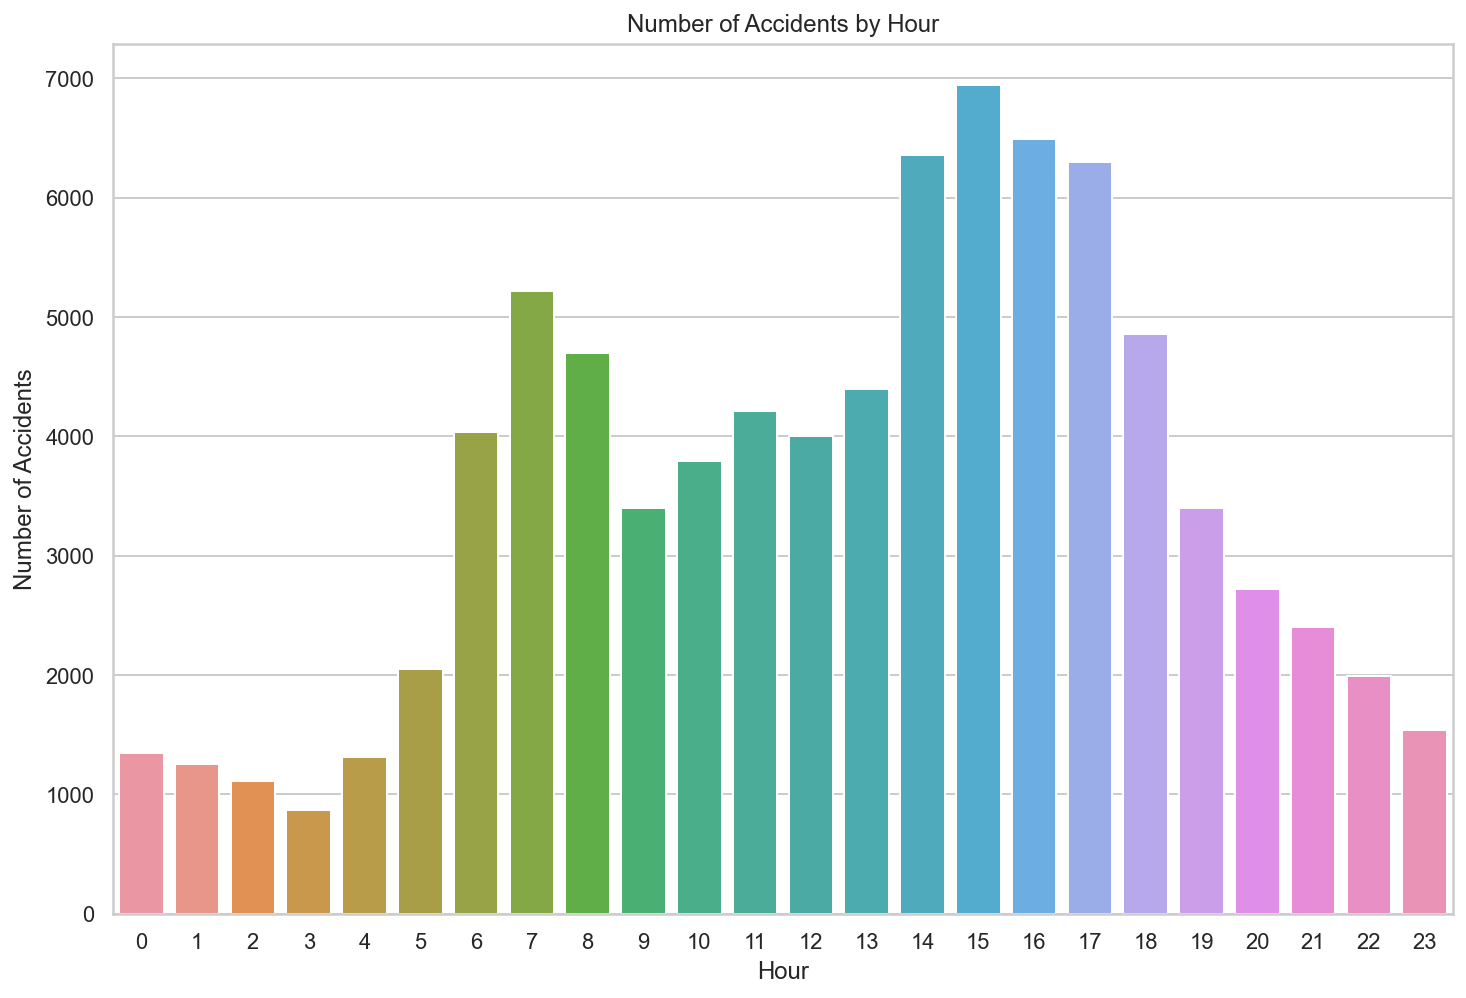

In [14]:
accidents_per_hour = df.groupby('Hour').size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(x='Hour', y='Count', data=accidents_per_hour)

# Set the labels and title
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour')

plt.show()


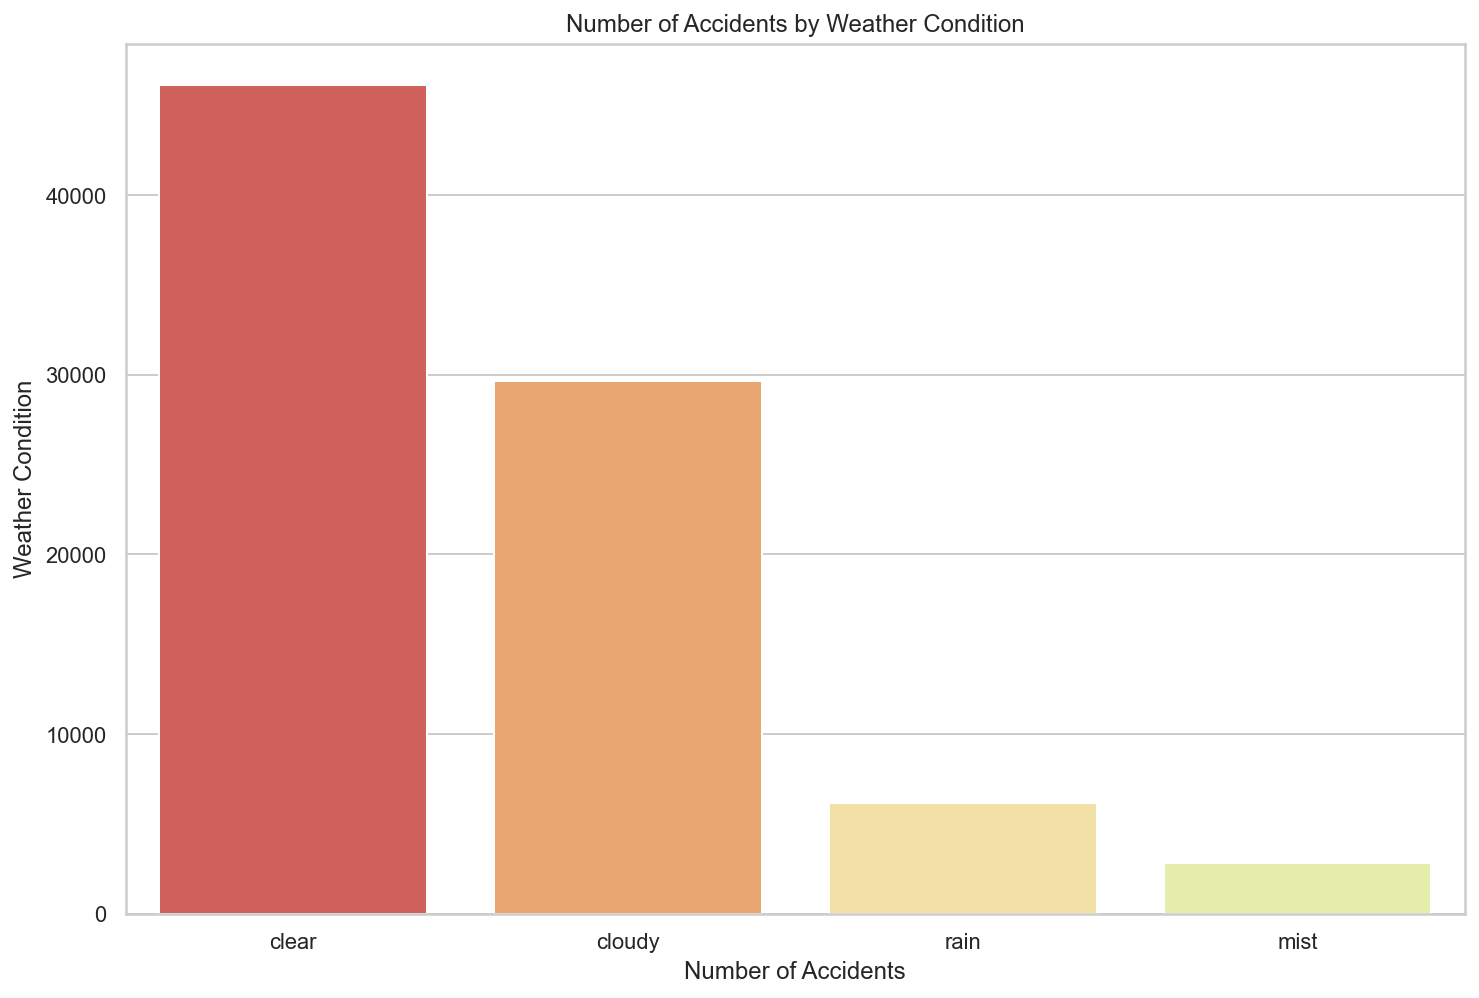

In [15]:
accidents_per_weather = df.groupby('Weather_Condition').size().reset_index(name='Count')
accidents_per_weather = accidents_per_weather.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.set_palette('Spectral')
sns.barplot(x='Weather_Condition', y='Count', data=accidents_per_weather)

plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.title('Number of Accidents by Weather Condition')

plt.show()


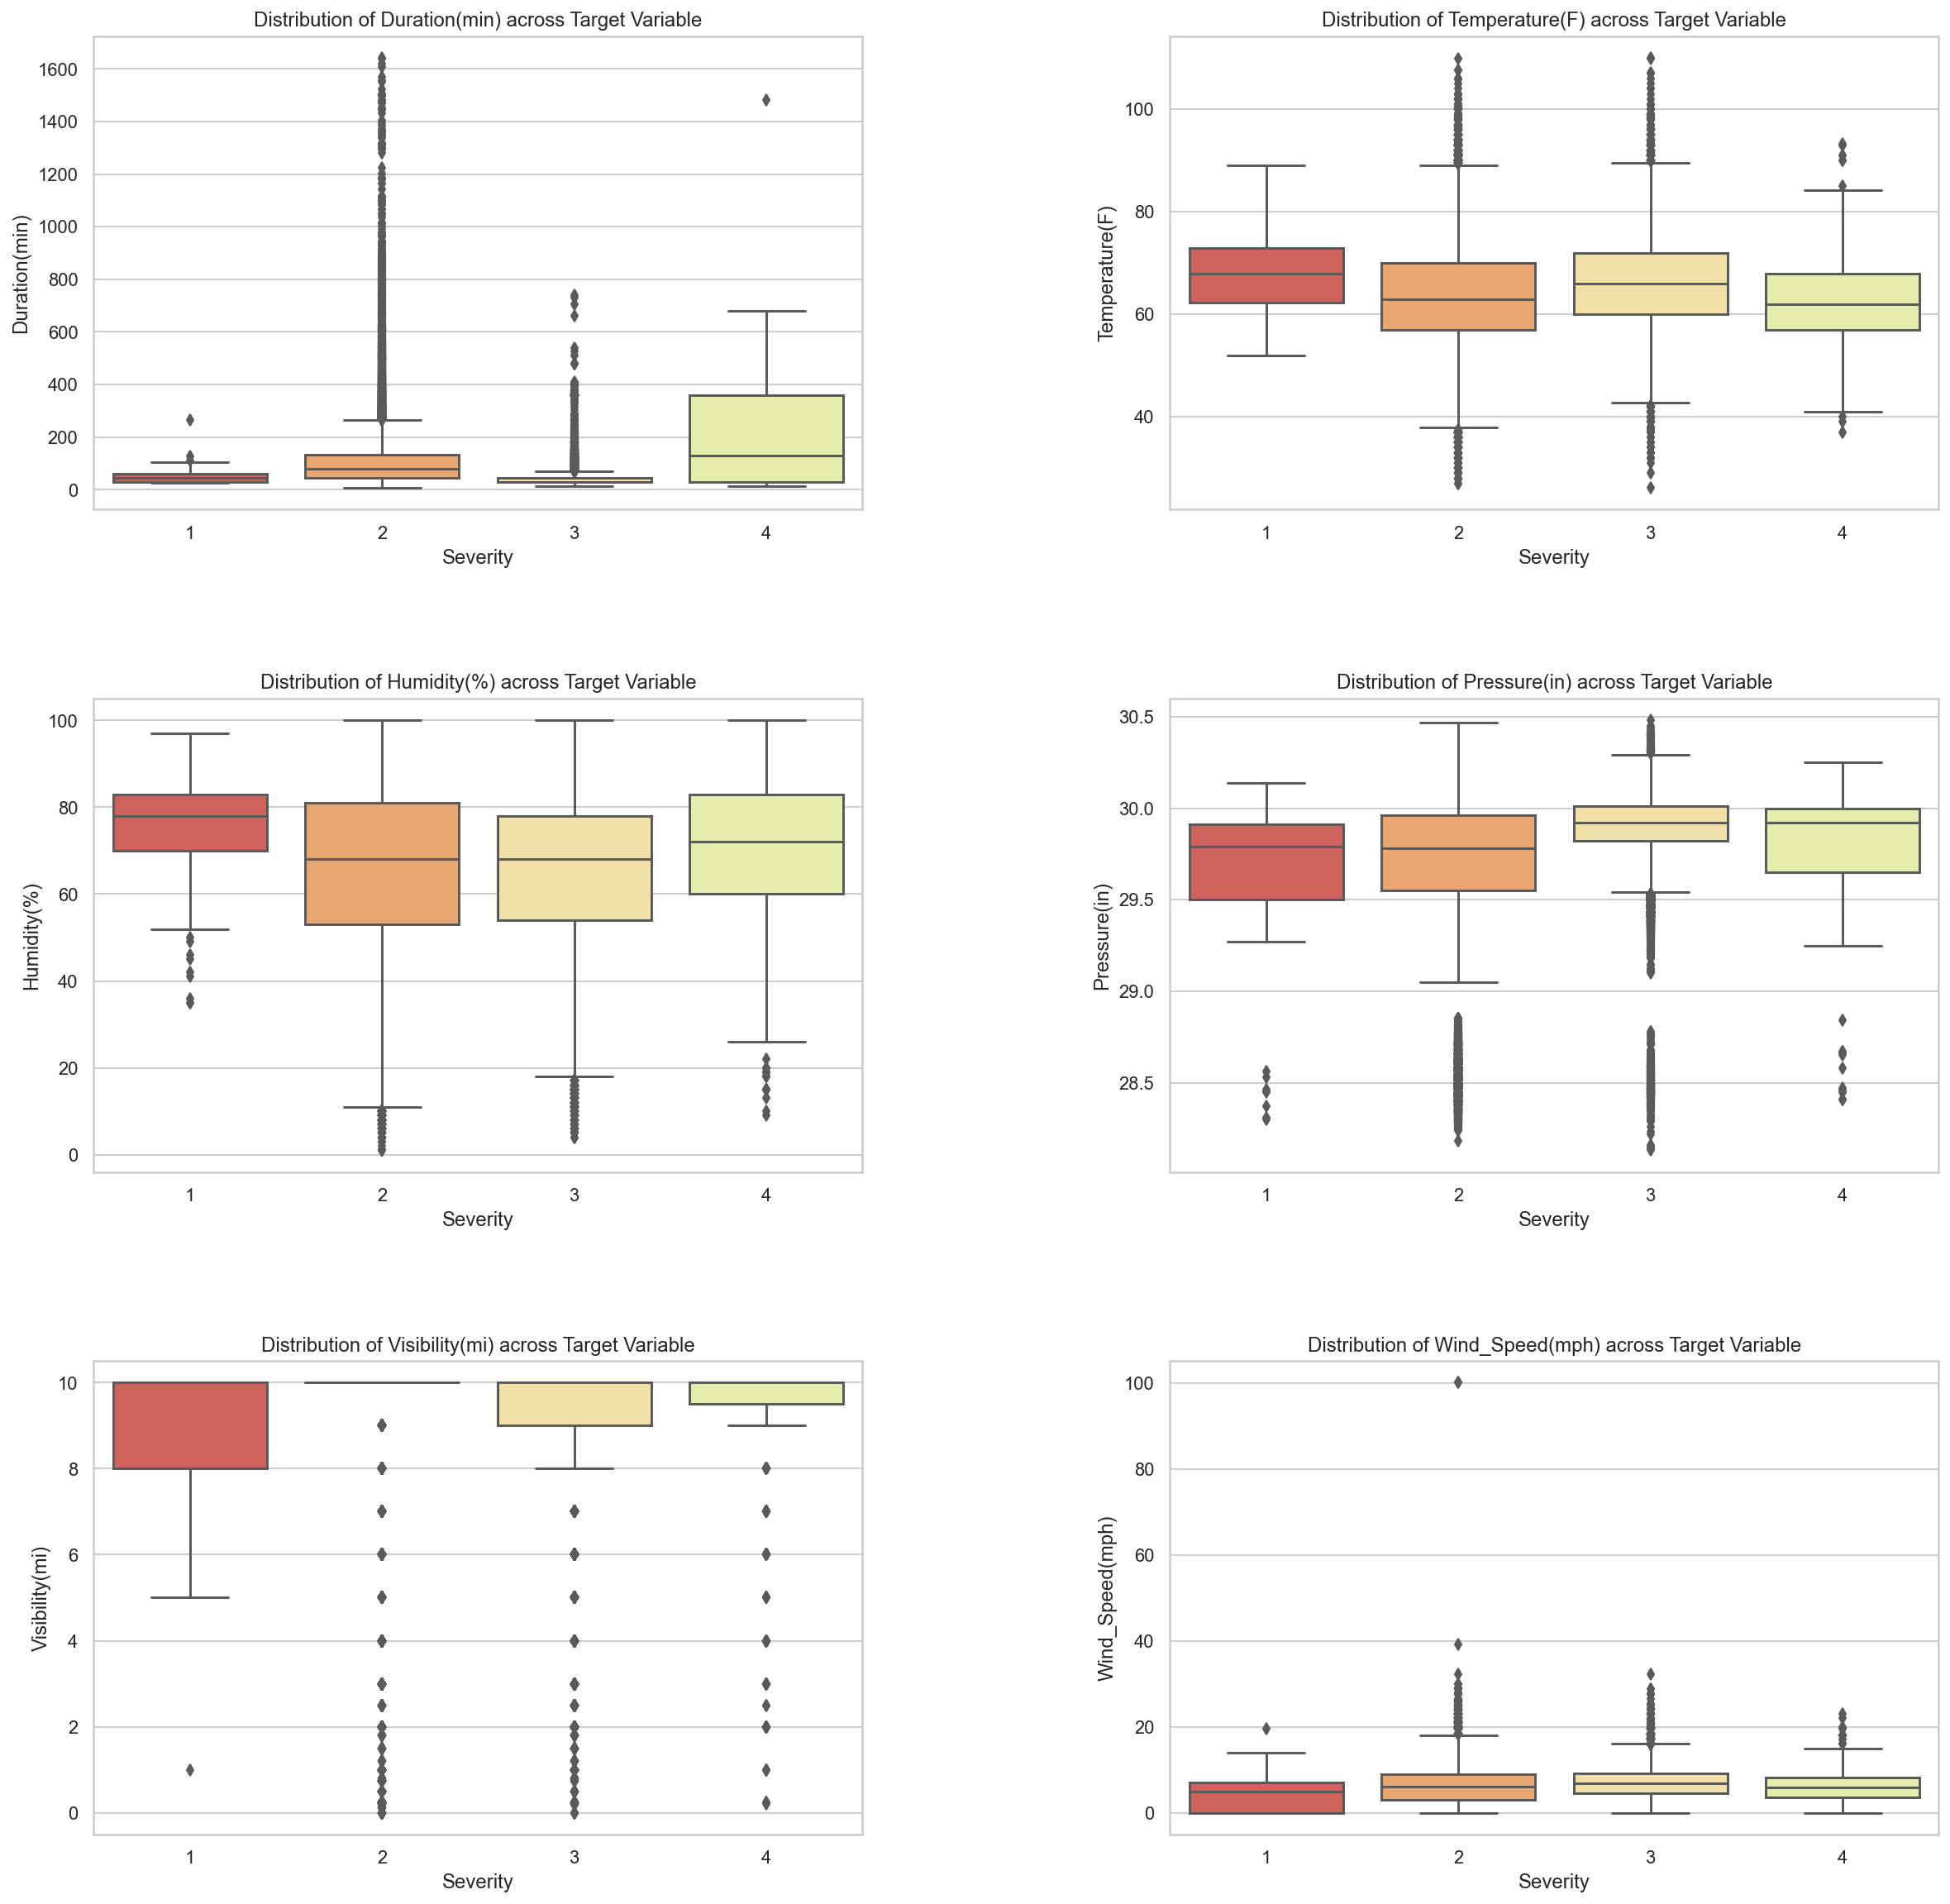

In [16]:
numerical_features = ['Duration(min)', 'Temperature(F)', 'Humidity(%)',
                      'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
target_variable = 'Severity' 

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, var in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.boxplot(y=var, x=target_variable, data=df, ax=axs[row][col])
    axs[row][col].set_title('Distribution of {} across Target Variable'.format(var))

plt.show()


In [17]:
print(df.apply(lambda col: col.unique()))

Severity                                                  [3, 2, 1, 4]
Weekday              [Tuesday, Wednesday, Thursday, Friday, Saturda...
Duration(min)        [30.0, 45.0, 60.0, 40.43, 42.63, 43.23, 41.03,...
Duration(day)                                                   [0, 1]
Start_Time           [2016-06-21T10:57:39.000000000, 2016-06-21T10:...
Street               [I-805 N, Escondido Fwy S, Elkelton Blvd, Call...
City                 [San Diego, Spring Valley, Santee, La Jolla, E...
Temperature(F)       [69.1, 73.0, 75.2, 71.1, 70.0, 72.0, 69.8, 84....
Humidity(%)          [75.0, 66.0, 61.0, 73.0, 76.0, 71.0, 78.0, 35....
Pressure(in)         [29.98, 29.97, 30.01, 30.0, 29.99, 29.95, 29.9...
Visibility(mi)       [9.0, 10.0, 7.0, 8.0, 6.0, 5.0, 4.0, 0.5, 3.0,...
Wind_Direction       [sw, w, ssw, wnw, s, variable, wsw, nw, nnw, s...
Wind_Speed(mph)      [8.1, 11.5, 9.2, 6.9, 5.8, 4.6, 3.5, 13.8, 12....
Weather_Condition                          [cloudy, clear, mist, rain]
Amenit

In [18]:
unique_counts = df.nunique()
print(unique_counts)

Severity                 4
Weekday                  7
Duration(min)        12348
Duration(day)            2
Start_Time           71042
Street                4539
City                    44
Temperature(F)         148
Humidity(%)             97
Pressure(in)           206
Visibility(mi)          22
Wind_Direction          18
Wind_Speed(mph)         50
Weather_Condition        4
Amenity                  2
Bump                     2
Crossing                 2
Give_Way                 2
Junction                 2
No_Exit                  2
Railway                  2
Roundabout               2
Station                  2
Stop                     2
Traffic_Calming          2
Traffic_Signal           2
Sunrise_Sunset           2
Year                     8
Month                   12
Day                     31
Hour                    24
Minute                  24
dtype: int64


In [19]:
predictors = ['Weekday','City','Temperature(F)', 'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)','Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station','Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Hour', 'Minute']
subset = df[predictors]

In [20]:
subset

,Weekday,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,...,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,Day,Hour,Minute
0,Tuesday,San Diego,69.1,75.0,29.98,9.0,sw,8.1,cloudy,0,...,0,0,0,0,1,2016,6,21,10,10
1,Tuesday,San Diego,73.0,66.0,29.97,10.0,w,8.1,cloudy,0,...,0,0,0,0,1,2016,6,21,10,10
2,Tuesday,Spring Valley,75.2,61.0,29.97,10.0,w,11.5,clear,0,...,0,0,0,0,1,2016,6,21,11,11
3,Tuesday,San Diego,71.1,73.0,30.01,9.0,ssw,9.2,cloudy,0,...,0,0,0,0,1,2016,6,21,11,11
4,Tuesday,Santee,75.2,61.0,30.00,10.0,wnw,6.9,cloudy,0,...,0,0,0,0,1,2016,6,21,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84713,Thursday,Escondido,79.0,47.0,28.33,10.0,wnw,8.0,clear,0,...,0,0,0,0,1,2019,8,22,18,18
84714,Thursday,Carlsbad,68.0,76.0,29.43,8.0,ssw,10.0,clear,0,...,0,0,0,0,1,2019,8,22,18,18
84715,Friday,San Diego,74.0,62.0,29.39,10.0,sw,7.0,clear,0,...,0,0,0,0,1,2019,8,23,15,15
84716,Friday,San Diego,75.0,64.0,29.80,10.0,variable,7.0,clear,0,...,0,0,0,0,1,2019,8,23,16,16


In [21]:
encoder = OneHotEncoder()
subset_col = ['Weekday', 'City','Wind_Direction','Weather_Condition', 'Year']
subset_df = subset[subset_col]

one_hot_encoded = encoder.fit_transform(subset_df)

encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names(subset_col))
final_df = pd.concat([encoded_df, subset.drop(subset_col, axis=1)], axis=1)


In [22]:
final_df

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,City_Aguanga,City_Alpine,City_Bonita,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Month,Day,Hour,Minute
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,6,21,10,10
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,6,21,10,10
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,6,21,11,11
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,6,21,11,11
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,6,21,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84713,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,8,22,18,18
84714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,8,22,18,18
84715,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,8,23,15,15
84716,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,8,23,16,16


In [23]:
#print(final_df.columns.tolist())

### Logistic Regression Model

In [24]:
X = final_df
y = df['Severity']
# 0.2/0.8 test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Log reg model
logregression = LogisticRegression(C=0.1, random_state=42, penalty="l2", max_iter=1000, n_jobs=-1)
logregression.fit(X_train, y_train)

# Feature selection
feature_selector = SelectFromModel(logregression)
selected_features = feature_selector.fit_transform(X_train, y_train)
feature_indices = feature_selector.get_support(indices=True)
selected_feature_names = X_train.columns[feature_indices]
print("Selected Features:",selected_feature_names)

y_pred_log_reg = logregression.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy)

Selected Features: Index(['Weekday_Saturday', 'Weekday_Sunday', 'City_Camp Pendleton',
       'City_Cardiff By the Sea', 'City_Carlsbad', 'City_Chula Vista',
       'City_Del Mar', 'City_Encinitas', 'City_Escondido', 'City_La Jolla',
       'City_Lakeside', 'City_Lemon Grove', 'City_National City',
       'City_Oceanside', 'City_Pala', 'City_Ramona', 'City_Rancho Santa Fe',
       'City_San Clemente', 'City_San Diego', 'City_San Marcos',
       'City_San Ysidro', 'City_Santee', 'City_Solana Beach',
       'City_Spring Valley', 'City_Valley Center', 'City_Vista', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023', 'Pressure(in)', 'Amenity', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')
Accuracy: 0.8441926345609065


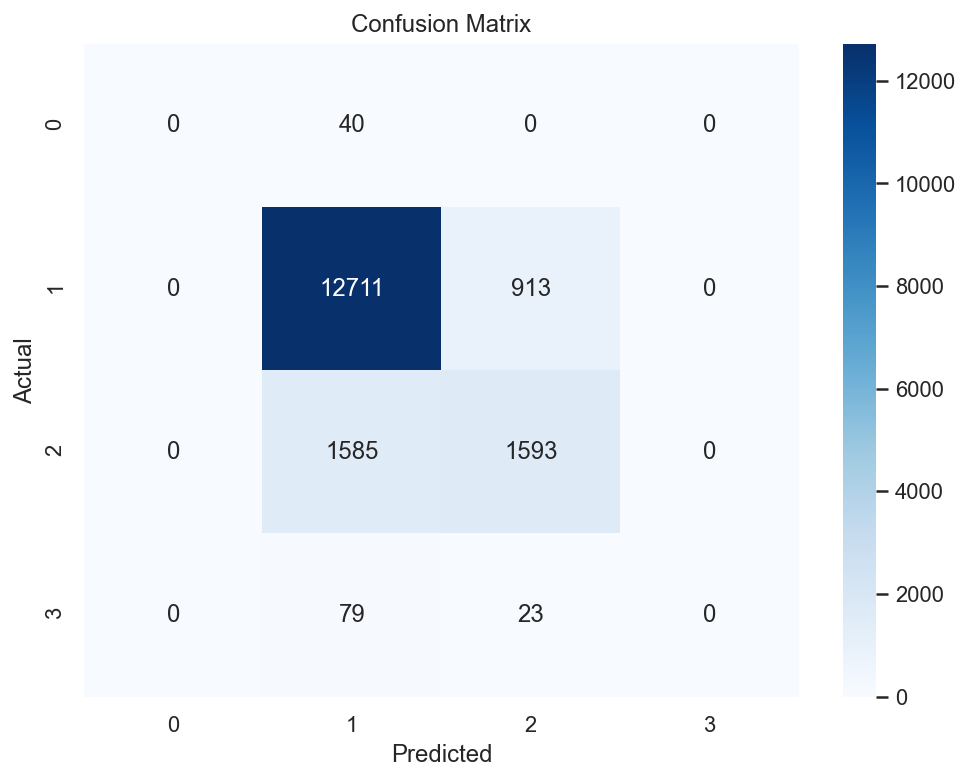

In [26]:
conf_mat = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
#logreg = LogisticRegression()
cv_scores = cross_val_score(logregression, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print ("Average CV Scores:", np.mean(cv_scores))

Cross-Validation Scores: [0.67953258 0.85487488 0.80836874 0.82104704 0.66918491]
Average CV Scores: 0.7666016316330759


### KNN Model


In [28]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# prediction
y_pred = knn.predict(X_test)
# accuracy
accuracy_score(y_test, y_pred)

0.7974504249291785

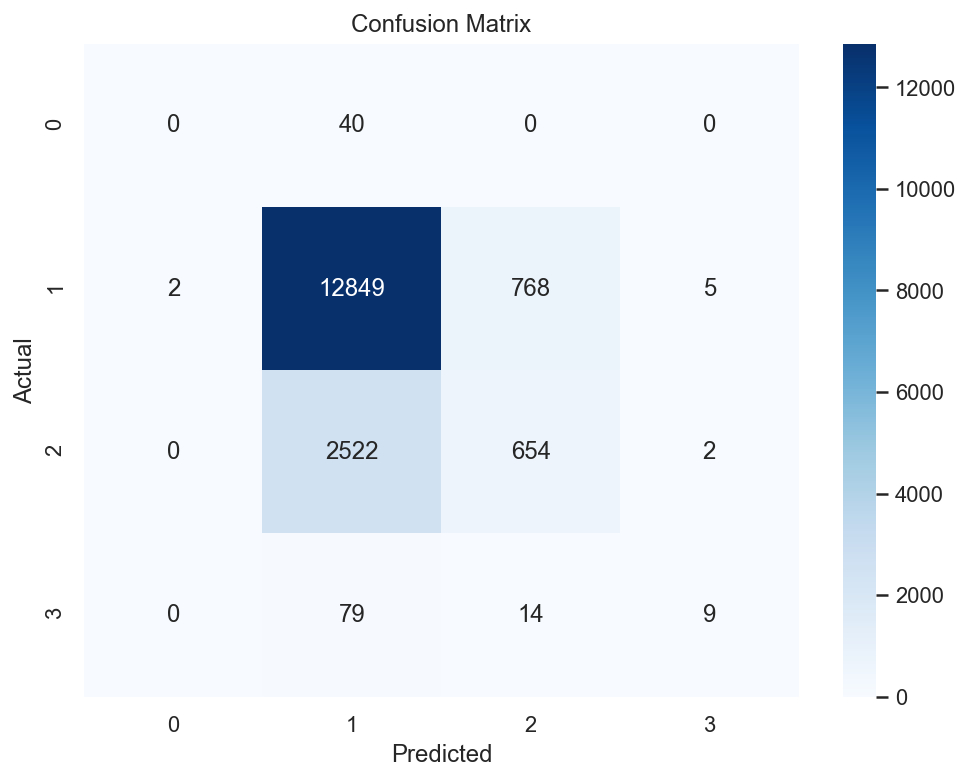

In [29]:
# confusion matrix
knn_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
knn_cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-Validation Scores:", knn_cv_scores)
print ("Average CV Scores:", np.mean(knn_cv_scores))

Cross-Validation Scores: [0.66229934 0.78482059 0.79219783 0.76108127 0.71799563]
Average CV Scores: 0.7436789315026548
